In [1]:
# import the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the dataset

data = pd.read_csv('nyc_taxi_trip_duration.csv')

In [3]:
data.shape

(729322, 11)

In [4]:
# remove rows with outliers in the 'trip_duration' column

data = data[(data['trip_duration'] >= 30) & (data['trip_duration'] < 20*3600)]

In [5]:
# convert the necessary columns into datetime objects

data['pickup_datetime'] = pd.to_datetime(data.pickup_datetime)
data['dropoff_datetime'] = pd.to_datetime(data.dropoff_datetime)

In [6]:
# extract the necessary features from the columns of type 'datetime'

data['pickup_hour'] = data['pickup_datetime'].dt.hour
data['dropoff_hour'] = data['dropoff_datetime'].dt.hour

data['pickup_dayofweek'] = data['pickup_datetime'].dt.dayofweek
data['dropoff_dayofweek'] = data['dropoff_datetime'].dt.dayofweek

In [7]:
# drop the columns which are not needed

drop_cols = ['id', 'pickup_datetime', 'dropoff_datetime']
data.drop(columns = drop_cols, inplace = True)

In [8]:
# dealing with the outliers

Q1 = data.trip_duration.quantile(0.25)
Q3 = data.trip_duration.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# identify the outliers and replace with the mean
outliers_1 = data[(data['trip_duration'] < lower_bound) | (data['trip_duration'] > upper_bound)]

print("Number of outliers in trip_duration column:", len(outliers_1))

Number of outliers in trip_duration column: 36167


In [9]:
outliers_2 = (data['trip_duration'] < lower_bound) | (data['trip_duration'] > upper_bound)
data.loc[outliers_2, 'trip_duration'] = data['trip_duration'].mean()

In [10]:
# outliers after replacing them with the mean is zero

outliers_3 = data[(data['trip_duration'] < lower_bound) | (data['trip_duration'] > upper_bound)]
print("Number of outliers in trip_duration column:", len(outliers_3))

Number of outliers in trip_duration column: 0


In [11]:
data.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_hour,dropoff_hour,pickup_dayofweek,dropoff_dayofweek
0,2,1,-73.953918,40.778873,-73.963875,40.771164,N,400.0,16,16,0,0
1,1,2,-73.988312,40.731743,-73.994751,40.694931,N,1100.0,23,23,4,4
2,2,2,-73.997314,40.721458,-73.948029,40.774918,N,1635.0,17,18,6,6
3,2,6,-73.961670,40.759720,-73.956779,40.780628,N,1141.0,9,10,1,1
4,1,1,-74.017120,40.708469,-73.988182,40.740631,N,848.0,6,6,2,2


In [14]:
data.passenger_count.value_counts()

1    514918
2    104720
5     38752
3     29591
6     24010
4     14002
0        14
9         1
Name: passenger_count, dtype: int64

In [15]:
data=data[(data.passenger_count!=0) | (data.passenger_count != 9)]

In [16]:
# encode the categorical variables

data = pd.get_dummies(data, columns=['vendor_id', 'pickup_dayofweek', 'dropoff_dayofweek','store_and_fwd_flag' ])

# print the first five rows of the encoded dataframe
from IPython.display import display
display(data.head())

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_hour,dropoff_hour,vendor_id_1,vendor_id_2,...,pickup_dayofweek_6,dropoff_dayofweek_0,dropoff_dayofweek_1,dropoff_dayofweek_2,dropoff_dayofweek_3,dropoff_dayofweek_4,dropoff_dayofweek_5,dropoff_dayofweek_6,store_and_fwd_flag_N,store_and_fwd_flag_Y
0,1,-73.953918,40.778873,-73.963875,40.771164,400.0,16,16,0,1,...,0,1,0,0,0,0,0,0,1,0
1,2,-73.988312,40.731743,-73.994751,40.694931,1100.0,23,23,1,0,...,0,0,0,0,0,1,0,0,1,0
2,2,-73.997314,40.721458,-73.948029,40.774918,1635.0,17,18,0,1,...,1,0,0,0,0,0,0,1,1,0
3,6,-73.961670,40.759720,-73.956779,40.780628,1141.0,9,10,0,1,...,0,0,1,0,0,0,0,0,1,0
4,1,-74.017120,40.708469,-73.988182,40.740631,848.0,6,6,1,0,...,0,0,0,1,0,0,0,0,1,0


In [17]:
from sklearn.model_selection import train_test_split

X = data.drop('trip_duration', axis=1) # Feature matrix
y = data['trip_duration'] # Target variable

# Splitting the data into 80% training set and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.metrics import mean_absolute_error as MAE, mean_squared_error as MSE, r2_score

lr = LinearRegression()

In [19]:
from sklearn.preprocessing import StandardScaler

# Preprocess data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit linear regression model
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [63]:
y_pred = lr.predict(X_test_scaled)

mse =  MSE(y_test, y_pred)
print('Mean Square Error: ', mse)
print('Root Mean Square Error', np.sqrt(mse))
print('Mean Absolute Error: ', MAE(y_test, y_pred))
print('r2_score: ', r2_score(y_test, y_pred))


Mean Square Error:  182229.64336810913
Root Mean Square Error 426.8836414857205
Mean Absolute Error:  339.33983382307304
r2_score:  0.0356092999272416


                 feature   coefficient
0        passenger_count  4.024561e+00
1       pickup_longitude  1.421519e+01
2        pickup_latitude -2.926453e+01
3      dropoff_longitude  2.737455e+01
4       dropoff_latitude -3.830710e+01
5            pickup_hour  8.018678e+00
6           dropoff_hour  3.523653e+00
7            vendor_id_1  1.097473e+13
8            vendor_id_2  1.097473e+13
9     pickup_dayofweek_0  1.007001e+14
10    pickup_dayofweek_1  1.039149e+14
11    pickup_dayofweek_2  1.055525e+14
12    pickup_dayofweek_3  1.072771e+14
13    pickup_dayofweek_4  1.082950e+14
14    pickup_dayofweek_5  1.075954e+14
15    pickup_dayofweek_6  1.023795e+14
16   dropoff_dayofweek_0 -2.887755e+13
17   dropoff_dayofweek_1 -2.979606e+13
18   dropoff_dayofweek_2 -3.026332e+13
19   dropoff_dayofweek_3 -3.072788e+13
20   dropoff_dayofweek_4 -3.103548e+13
21   dropoff_dayofweek_5 -3.087322e+13
22   dropoff_dayofweek_6 -2.947797e+13
23  store_and_fwd_flag_N  1.210790e+15
24  store_and_fwd_flag_Y 

Text(0, 0.5, 'coefficients')

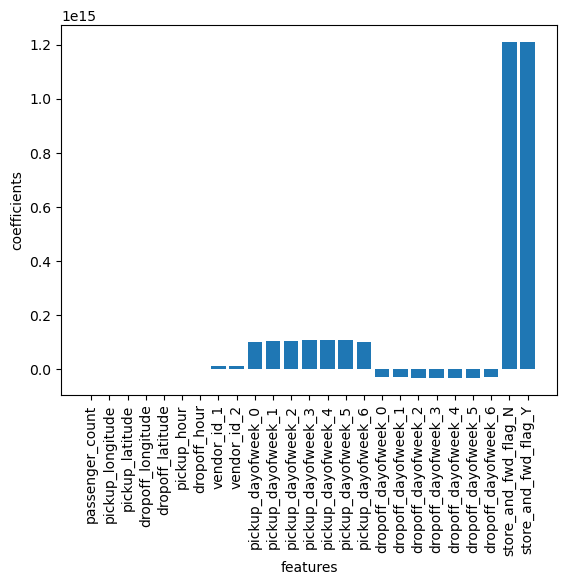

In [21]:
# coefficents of Linear Regression Model

coef_df = pd.DataFrame({'feature': X.columns, 'coefficient': lr.coef_})
print(coef_df)
plt.bar(X.columns, lr.coef_)
plt.xlabel('features')
plt.xticks(rotation=90)
plt.ylabel('coefficients')

# Lasso Regression

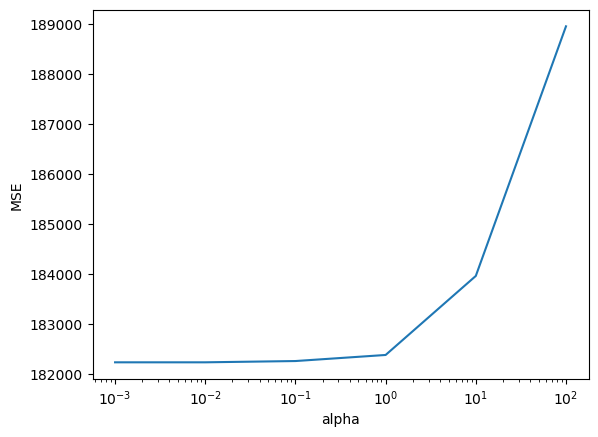

In [22]:
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

# fit a Lasso regression model for each alpha and calculate the MSE
mse_values = []
for alpha in alphas:
    model = Lasso(alpha=alpha)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = MSE(y_test, y_pred)
    mse_values.append(mse)

# plot the MSE values for each alpha
plt.plot(alphas, mse_values)
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.xscale('log')
plt.show()


In [64]:
# by looking at the above plot, choose alpha = 0.1

lasso = Lasso(alpha=0.1)

# fit the lasso regression model
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)

# measure the performance of the model
mse =  MSE(y_test, y_pred)
print('Mean Square Error: ', mse)
print('Root Mean Square Error', np.sqrt(mse))
print('Mean Absolute Error: ', MAE(y_test, y_pred) )
print('r2_score: ', r2_score(y_test, y_pred))

Mean Square Error:  188880.68719551168
Root Mean Square Error 434.60405796024463
Mean Absolute Error:  347.2070887022118
r2_score:  0.0004108289519872965


                 feature   coefficient
0        passenger_count  4.135731e+00
1       pickup_longitude  1.424803e+01
2        pickup_latitude -2.901672e+01
3      dropoff_longitude  2.740027e+01
4       dropoff_latitude -3.829260e+01
5            pickup_hour  7.859252e+00
6           dropoff_hour  3.414979e+00
7            vendor_id_1 -1.457574e+00
8            vendor_id_2  2.200115e-15
9     pickup_dayofweek_0 -2.335098e+01
10    pickup_dayofweek_1  1.210089e+01
11    pickup_dayofweek_2  3.719451e+01
12    pickup_dayofweek_3  5.156810e+01
13    pickup_dayofweek_4  3.415642e+01
14    pickup_dayofweek_5 -1.353958e+01
15    pickup_dayofweek_6 -6.328545e+01
16   dropoff_dayofweek_0  1.719439e+01
17   dropoff_dayofweek_1 -5.139200e+00
18   dropoff_dayofweek_2 -2.526784e+01
19   dropoff_dayofweek_3 -3.859068e+01
20   dropoff_dayofweek_4 -2.594934e+01
21   dropoff_dayofweek_5  6.939714e+00
22   dropoff_dayofweek_6  4.860343e+01
23  store_and_fwd_flag_N -5.421906e+00
24  store_and_fwd_flag_Y 

Text(0, 0.5, 'coefficients')

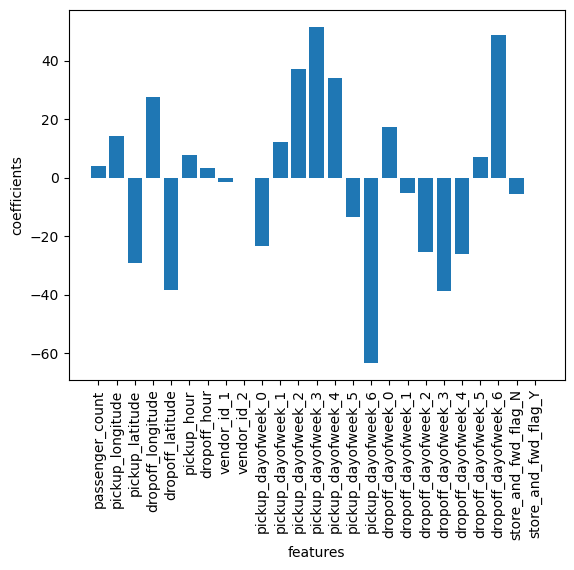

In [24]:
# evaluate the coefficients of the Lasso Regression Model

coef_df = pd.DataFrame({'feature': X.columns, 'coefficient': lasso.coef_})
print(coef_df)
plt.bar(X.columns, lasso.coef_)
plt.xlabel('features')
plt.xticks(rotation=90)
plt.ylabel('coefficients')

# Ridge regression

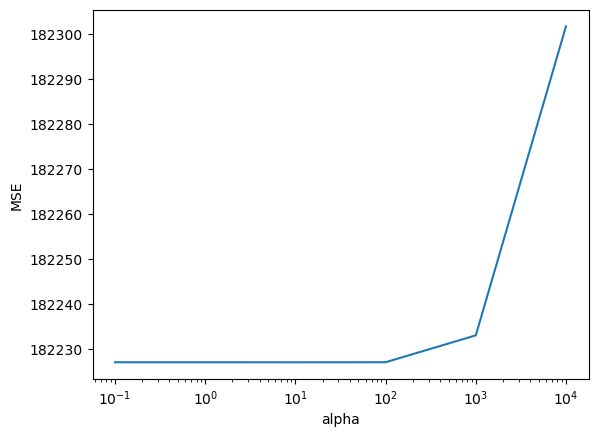

In [25]:
alphas = [0.1, 1, 10, 100, 1000, 10000]

# fit a Ridge regression model for each alpha and calculate the MSE
mse_values = []
for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = MSE(y_test, y_pred)
    mse_values.append(mse)

# plot the MSE values for each alpha
plt.plot(alphas, mse_values)
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.xscale('log')
plt.show()

In [65]:
ridge = Ridge(alpha=10)

# fit the ridge regression model
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)

# measure the accuracy of the model
mse =  MSE(y_test, y_pred)
print('Mean Square Error: ', mse)
print('Root Mean Square Error', np.sqrt(mse))
print('Mean Absolute Error: ', MAE(y_test, y_pred) )
print('r2_score: ', r2_score(y_test, y_pred))

Mean Square Error:  188878.9011912285
Root Mean Square Error 434.60200320664484
Mean Absolute Error:  347.19034804557185
r2_score:  0.0004202807946686038


                 feature  coefficient
0        passenger_count     4.137453
1       pickup_longitude    14.274495
2        pickup_latitude   -28.988281
3      dropoff_longitude    27.329475
4       dropoff_latitude   -38.244698
5            pickup_hour     9.528612
6           dropoff_hour     1.733098
7            vendor_id_1    -0.732965
8            vendor_id_2     0.732965
9     pickup_dayofweek_0   -21.254167
10    pickup_dayofweek_1     5.828792
11    pickup_dayofweek_2    23.158337
12    pickup_dayofweek_3    35.725989
13    pickup_dayofweek_4    24.202345
14    pickup_dayofweek_5   -14.639519
15    pickup_dayofweek_6   -56.537242
16   dropoff_dayofweek_0    13.165473
17   dropoff_dayofweek_1    -0.885785
18   dropoff_dayofweek_2   -13.268628
19   dropoff_dayofweek_3   -24.773922
20   dropoff_dayofweek_4   -17.962908
21   dropoff_dayofweek_5     6.121694
22   dropoff_dayofweek_6    39.945090
23  store_and_fwd_flag_N    -2.715085
24  store_and_fwd_flag_Y     2.715085


Text(0, 0.5, 'coefficients')

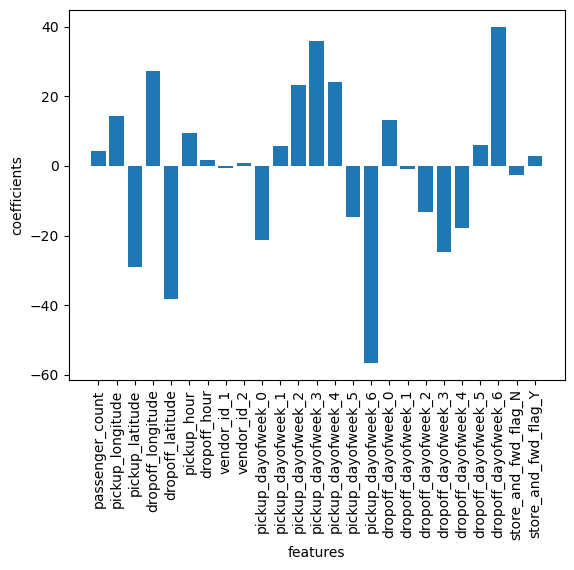

In [27]:
# evaluate the coefficients of the Ridge Regression Model

coef_df = pd.DataFrame({'feature': X.columns, 'coefficient': ridge.coef_})
print(coef_df)
plt.bar(X.columns, ridge.coef_)
plt.xlabel('features')
plt.xticks(rotation=90)
plt.ylabel('coefficients')

 # Decision Tree

In [28]:
from sklearn.tree import DecisionTreeRegressor

# create a instance of the decision tree object by setting the parameters to the required value
dtr = DecisionTreeRegressor(max_depth=4, min_samples_split=10, random_state=42)
dtr.fit(X_train, y_train)

# evaluate model on testing data
y_pred = dtr.predict(X_test_scaled)

In [66]:
# evaluate the performance of the model

mse =  MSE(y_test, y_pred)
print('Mean Square Error: ', mse)
print('Root Mean Square Error', np.sqrt(mse))
print('Mean Absolute Error: ', MAE(y_test, y_pred) )
print('r2_score: ', r2_score(y_test, y_pred))

Mean Square Error:  188878.9011912285
Root Mean Square Error 434.60200320664484
Mean Absolute Error:  347.19034804557185
r2_score:  0.0004202807946686038


In [30]:
# interpreting the variable importance

importance = dtr.feature_importances_
feature_names = X.columns
for feature_name, importance_score in zip(feature_names, importance):
    print(feature_name, ':', importance_score)

passenger_count : 0.0
pickup_longitude : 0.3058736306368555
pickup_latitude : 0.2568527278315162
dropoff_longitude : 0.2567229430150598
dropoff_latitude : 0.16528103297512092
pickup_hour : 0.009093194580235282
dropoff_hour : 0.0061764709612121705
vendor_id_1 : 0.0
vendor_id_2 : 0.0
pickup_dayofweek_0 : 0.0
pickup_dayofweek_1 : 0.0
pickup_dayofweek_2 : 0.0
pickup_dayofweek_3 : 0.0
pickup_dayofweek_4 : 0.0
pickup_dayofweek_5 : 0.0
pickup_dayofweek_6 : 0.0
dropoff_dayofweek_0 : 0.0
dropoff_dayofweek_1 : 0.0
dropoff_dayofweek_2 : 0.0
dropoff_dayofweek_3 : 0.0
dropoff_dayofweek_4 : 0.0
dropoff_dayofweek_5 : 0.0
dropoff_dayofweek_6 : 0.0
store_and_fwd_flag_N : 0.0
store_and_fwd_flag_Y : 0.0


# Train Scores and Plot

In [31]:
# evaluating the training score of linear Regression

lr.fit(X_train_scaled, y_train)
train_score_lr = lr.score(X_train_scaled, y_train)
print("Training score for Linear Regression:", train_score_lr)

Training score for Linear Regression: 0.02766356397524916


In [32]:
#evaluating the training score of Decision Tree Regression

dtr.fit(X_train_scaled, y_train)
train_score_dtr = dtr.score(X_train_scaled, y_train)
print("Training score for Decision Tree Regression:", train_score_dtr)

Training score for Decision Tree Regression: 0.19055756204405172


In [49]:
# evaluating the training score of K Nearest Neighbours Regression for a subset of the data to get the results in real time
# we have found out that the best value of k is 7 in the knn model

from sklearn.neighbors import KNeighborsRegressor

# Fit the model on the subset of training data
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train[:185000], y_train[:185000])

KNeighborsRegressor(n_neighbors=7)

In [50]:
# Calculate the training score

train_score_knn = knn.score(X_train[:185000], y_train[:185000])
print("Training score for K Nearest Neighbours:", train_score_knn)

Training score for K Nearest Neighbours: 0.5465844209185782


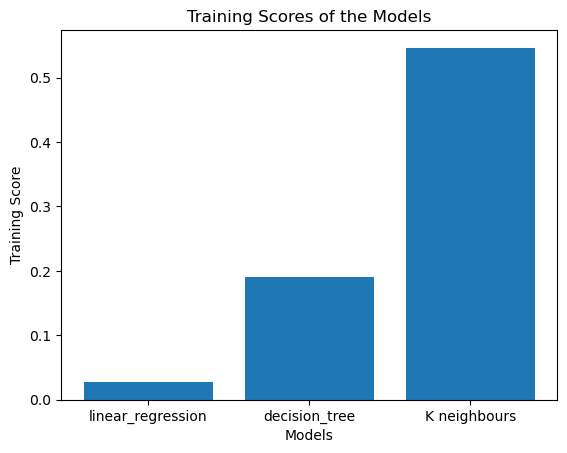

In [51]:
# we get a low value for KNN as we have used only sample of the dataset

models = ['linear_regression', 'decision_tree', 'K neighbours']
training_scores = [train_score_lr, train_score_dtr, train_score_knn]
 
plt.bar(models, training_scores)
plt.title('Training Scores of the Models')
plt.xlabel('Models')
plt.ylabel('Training Score')
plt.show()

In [52]:
test_score_lr = lr.score(X_test_scaled, y_test)
print("Testing score for Linear Regression:", test_score_lr)

Testing score for Linear Regression: 0.0356092999272416


In [53]:
test_score_dtr = dtr.score(X_test_scaled, y_test)
print("Testing score for Decision Tree:", test_score_dtr)

Testing score for Linear Regression: 0.19011389682789237


In [61]:
test_score_knn = knn.score(X_test_scaled[:20000], y_test[:20000])
print("Testing score for K Nearest Neighbours:", test_score_knn)

# i'm getting a low value of score since i have used less number of samples for training the model

Testing score for K Nearest Neighbours: -0.25821727539450334


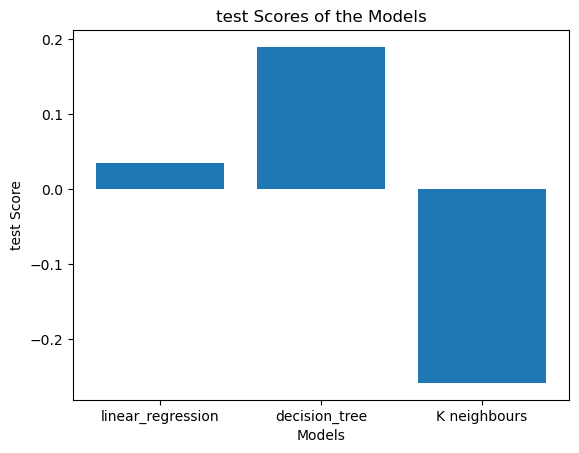

In [62]:
# plotting the bar plot for the test scores

models = ['linear_regression', 'decision_tree', 'K neighbours']
test_scores = [test_score_lr, test_score_dtr, test_score_knn]
 
plt.bar(models, test_scores)
plt.title('test Scores of the Models')
plt.xlabel('Models')
plt.ylabel('test Score')
plt.show()

In [ ]:
# the metrics that i have used to evalute the models are 'mean squared error', 'root mean squared error', 
# 'mean absolute error' and 'R squared'
# 'root mean squared error' and 'mean absolute error' are the most suitable evaluation metrics for regression problems
# MAE measures the average absolute difference between the predicted and actual values, 
# and unlike RMSE, it is not sensitive to outliers
# RMSE is also preferred in practice as it puts a higher weight on large errors,
# which can be more important in some applications